## Introduction

Let’s explore whether higher film budgets correlate with increased box office revenue by analyzing movie budgets and their financial performance data.

### Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
data_int = pd.read_csv('international_cost_revenue_dirty.csv')

In [4]:
data_dom = pd.read_csv('domestic_cost_revenue_dirty.csv')

### Exploring and Merging the Dataset

There are two data sets which showing worldwide revenue and domestic(US) revenue of each movie from (1915 to 2018*). Both data are merged for the easy of analysis.

Note that *domestic* in this context refers to the United States

Note that exact scrapping date is May 1st,2018

In [5]:
data_int.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000"


In [6]:
data_dom.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$11,000,000"


In [7]:
data=pd.merge(data_int,data_dom[['Rank','USD_Domestic_Gross']], on='Rank',how='left')
data=data.drop_duplicates()

In [8]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


### Data Cleaning

In [9]:
data.isna().values.any()

False

In [10]:
data.shape

(5391, 6)

In [11]:
data.duplicated().values.any()

False

In [12]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

### Data Type Conversions (Challege)

Transform the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns into numeric format by eliminating the '$' symbols and ','.

In [13]:
# Take a value from USD_Worldwide_Gross Column as a example
example_value = data['USD_Worldwide_Gross'].iloc[0]

print(f"Value's type:{type(example_value)}")

Value's type:<class 'str'>


In [14]:
columns = ['USD_Production_Budget', 'USD_Worldwide_Gross','USD_Domestic_Gross']
chars_to_remove = ['$',',']

for column in columns:
    for char in chars_to_remove:
        data[column] = data[column].astype(str).str.replace(char,'') # to remove '$' and ',' in each column
    data[column] = pd.to_numeric(data[column]) # to convert the type of column to numeric type

In [15]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


Convert the Release_Date column to a Pandas Datetime type.

In [17]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

In [19]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


The average film costs about \\$ 31 million to produce and generates approximately three times that amount, or around \\$89 million, in worldwide revenue. This is quite encouraging!

However, it's importatnt to note that many films do lose money. In fact, all films in the bottom quartile are unprofitable, with an average production cost of \\$5 million but only bringing in \\$3.8 million in worldwide revenue.

Interestingly, the minimum domestic and worldwide revenue is \\$0. This make sense, as films that never get screened or are cancelled would naturally generate no revenue.

On the other end of the spectrum, the highest production budget recorded was staggering \\$425 million, while the highest worldwide revenue readched an incredible \\$2.7 billion. That's \\$2.7 billion in revenus truly astonishing!



#### Highest budget film in the dataset is


In [20]:
data[data['USD_Production_Budget']==425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


#### Lowest budget film in the dataset is

In [21]:
data[data['USD_Production_Budget']==1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


### Investigating the Zero Revenue Films

#### Domestically \\$0 Earning

In [22]:
zero_domestic = data[data['USD_Domestic_Gross']==0]

print(f'Number of films that earn $0 in domestic is {len(zero_domestic)}')

Number of films that earn $0 in domestic is 512


In [23]:
zero_domestic.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0


In [24]:
zero_domestic.sort_values('USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


#### Worldwide $0 Earning

In [25]:
zero_worldwide = data[data['USD_Worldwide_Gross']==0]

print(f'Number of films that earn $0 in worldwide is {len(zero_worldwide)}')

Number of films that earn $0 in worldwide is 357


In [26]:
zero_worldwide.sort_values('Release_Date',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
...,...,...,...,...,...,...
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
6,4630,1927-12-08,Wings,2000000,0,0


### Filter out unreleased films

The dataset was scraped on May 1st 2018. That means the films after this date are yet to be released and will generate noise for the dataset analyse.

In [27]:
data_scrape = pd.Timestamp('2018-05-18')

In [28]:
unreleased_film = data[data.Release_Date>data_scrape]
print(f'Number of unreleased movies is {len(unreleased_film)}')
unreleased_film

Number of unreleased movies is 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [29]:
data_clean = data.drop(unreleased_film.index)

In [30]:
data.shape[0]-data_clean.shape[0]

7

### Films that Lost Money

Determine the percentage of films where the production costs exceeded the worldwide gross revenue

In [31]:
lost_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')

In [32]:
len(lost_money)/len(data_clean)*100

37.27711738484398

### Data Visualization

In [33]:
import seaborn as sns
import matplotlib.ticker as ticker

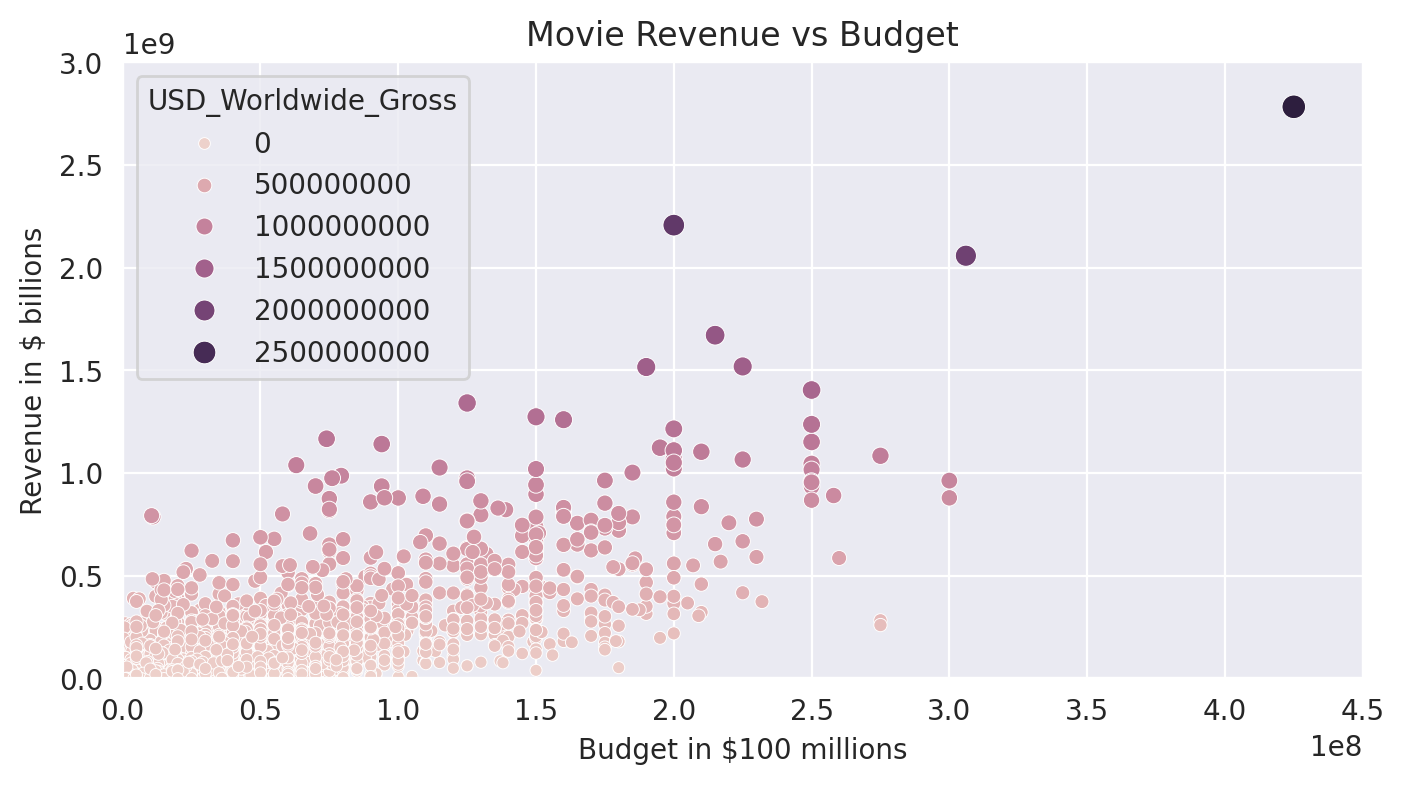

In [34]:
plt.figure(figsize = (8,4),dpi=200)

with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data=data_clean,
                    x='USD_Production_Budget',
                    y='USD_Worldwide_Gross',
                    hue = 'USD_Worldwide_Gross',
                    size = 'USD_Worldwide_Gross')

    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel = 'Revenue in $ billions',
           xlabel = 'Budget in $100 millions',
           title = 'Movie Revenue vs Budget')

plt.show()

#### Plotting Movie Releases over Time

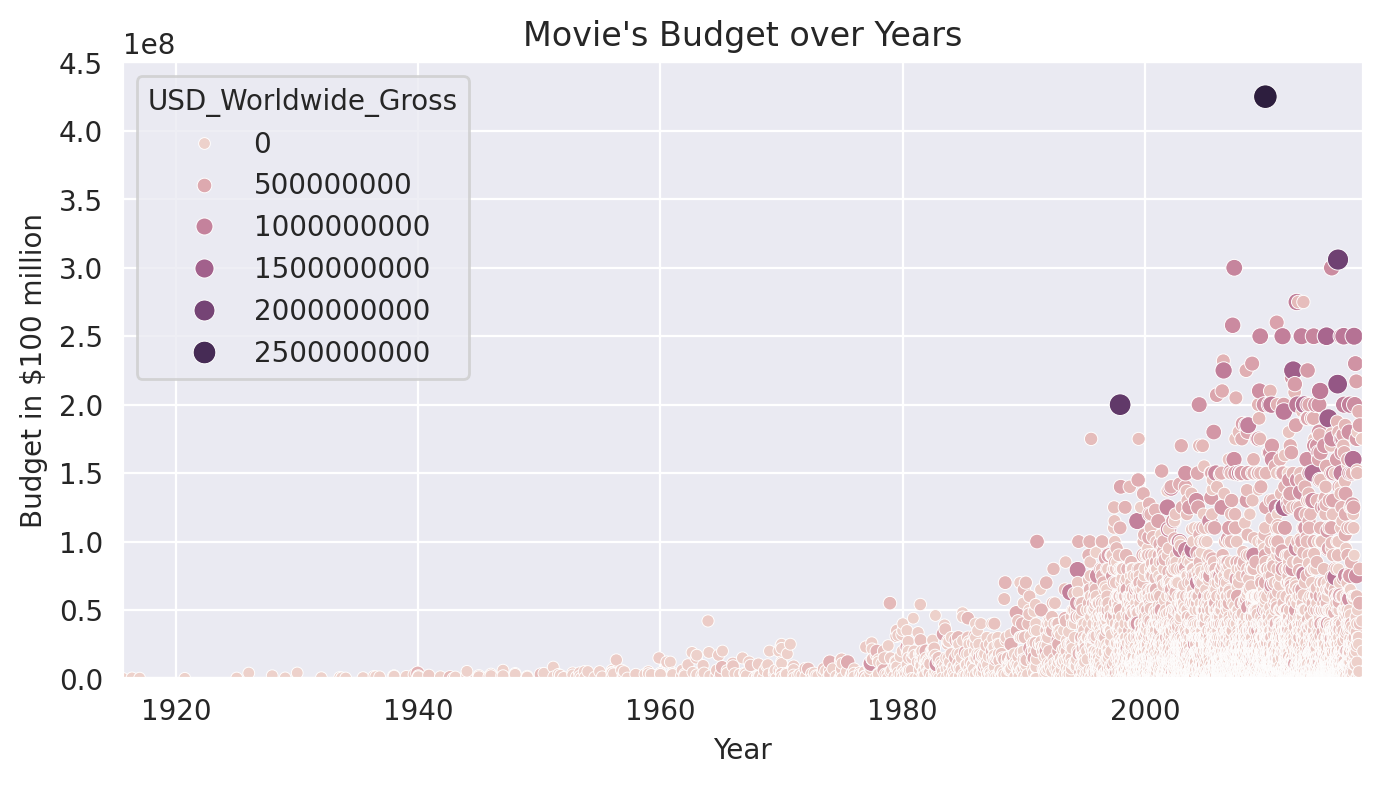

In [35]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data=data_clean,
                    x = 'Release_Date',
                    y = 'USD_Production_Budget',
                    hue = 'USD_Worldwide_Gross',
                    size = 'USD_Worldwide_Gross')
    
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(),data_clean.Release_Date.max()),
           ylabel = 'Budget in $100 million',
           xlabel = 'Year',
           title = "Movie's Budget over Years")

plt.show()

Movie budgets have skyrocketed over the past 40 years. Before the 1970s, the industry was in a different era. Budgets began to surge in the 1980s and continued through the 2000s. Additionally, the industry has expanded significantly, producing many more films. From 2000 onwards, the data points are so dense they overlap.

### Converting Years to Decades Trick

In [36]:
dt_index = pd.DatetimeIndex(data_clean['Release_Date'])
year =dt_index.year

In [37]:
decades = year // 10*10
decades

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)

In [38]:
data_clean['Decades'] = decades

In [39]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the films made before and after 1970

In [40]:
old_films = data_clean[data_clean.Decades <=1960]
new_films = data_clean[data_clean.Decades >1960]

In [41]:
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960


In [42]:
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Plotting Linear Regressions with Seaborn

#### Old Films (Before 1970)

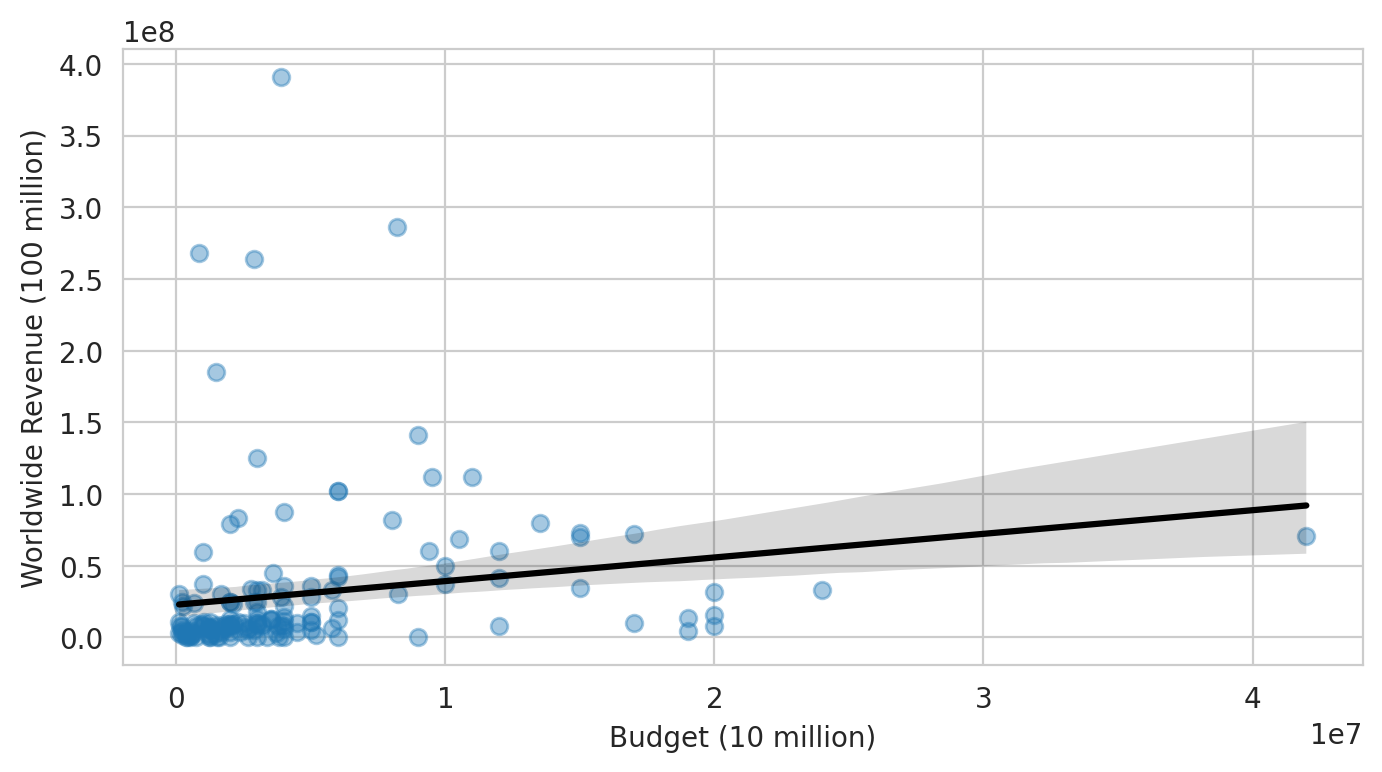

In [43]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    ax = sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
    
    ax.set(xlabel = 'Budget (10 million)',
           ylabel = 'Worldwide Revenue (100 million)')
    

From the regression graph, many lower-budget films (old films) have achieved significant profits! The correlation between production budget and movie revenue is weak. Numerous data points on the lower end of the budget spectrum are far from the trend line, indicating that the line does not accurately represent the relationship between budget and revenue.

#### New Films (after 1970)

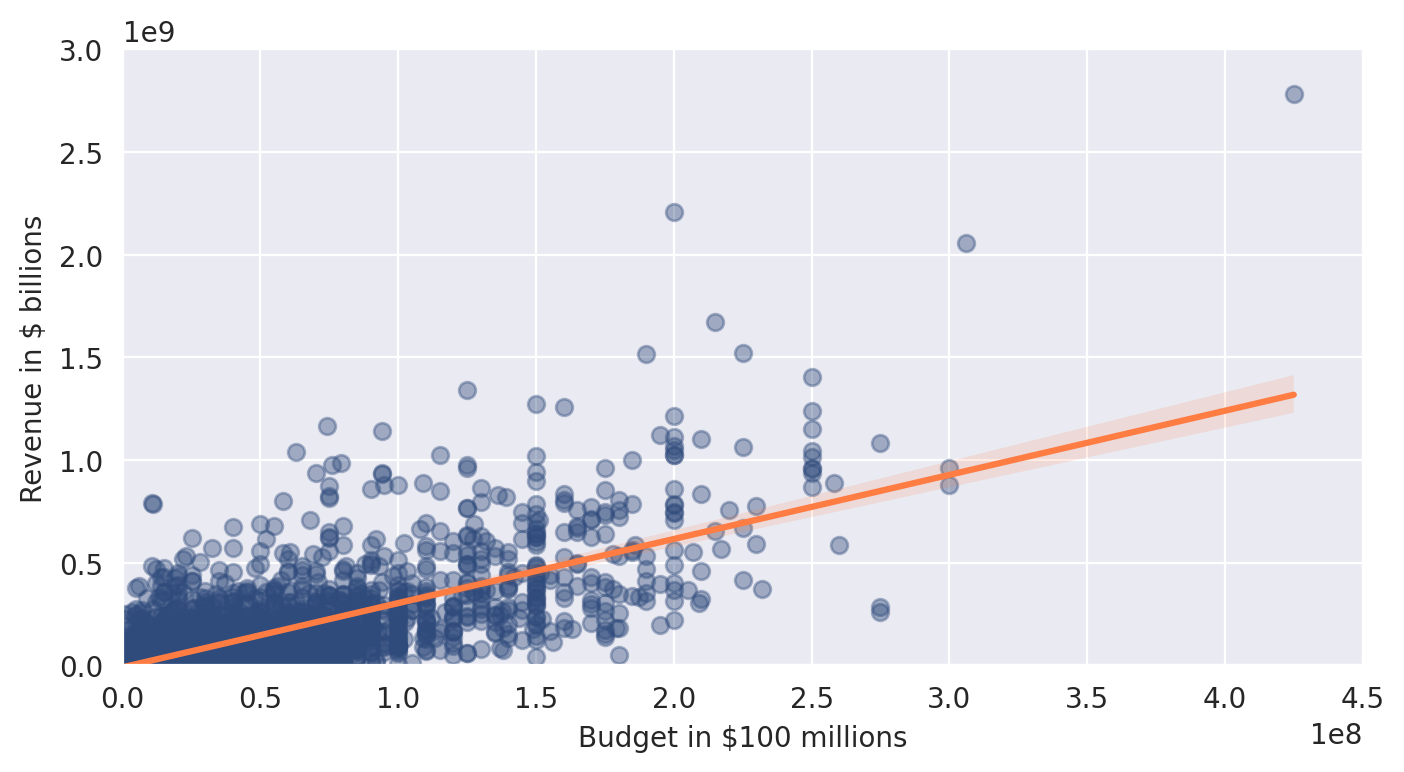

In [44]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color = '#2f4b7c',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
    ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

The films after 1970 there is a general trend showing that higher production budgets tend to result in higher worldwide gross revenues. 

### Supervised ML - Simple Regressions


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regression = LinearRegression()

In [47]:
X = new_films[['USD_Production_Budget']]
y = new_films[['USD_Worldwide_Gross']]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20) #the sequence matters

In [50]:
slr_model = LinearRegression()

In [51]:
slr_model.fit(X_train, y_train)

LinearRegression()

In [52]:
slr_model.intercept_

array([-9861776.47602567])

In [53]:
slr_model.coef_

array([[3.19882202]])

In [54]:
y_pred = slr_model.predict(X_test) 

In [55]:
slr_model.intercept_

array([-9861776.47602567])

In [56]:
import numpy as np


new_budget = 350000000

newInput = np.array(new_budget).reshape(-1,1)

predicted_revenue = slr_model.predict(newInput)

In [57]:
from sklearn import metrics 

In [58]:
accuracy_slr = metrics.r2_score(y_test,y_pred)
print("The R2 is: ", round(accuracy_slr*100,2), "%")

The R2 is:  55.41 %


In [59]:
 print(f'The estimated revenue for a $350 film budget is around ${float(predicted_revenue):.11}')

The estimated revenue for a $350 film budget is around $1109725931.7


### Supervised ML-KNN

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
# Initialize KNN model (you can choose an appropriate value for k)
knn_model = KNeighborsRegressor(n_neighbors=31)  # Example: k=5

In [62]:
# Fit the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=31)

In [63]:
y_pred_knn = knn_model.predict(X_test)

In [64]:
accuracy_knn = metrics.r2_score(y_test,y_pred_knn)
print("The R2 is: ", round(accuracy_knn*100,2), "%")

The R2 is:  53.59 %


In [65]:
import numpy as np
new_budget = 350000000
newInput = np.array(new_budget).reshape(-1,1)
predicted_revenue = knn_model.predict(newInput)
predicted_revenue

print(f'The estimated revenue for a $350 film budget is around ${float(predicted_revenue):.11}')

The estimated revenue for a $350 film budget is around $926628214.32


In [66]:
for n in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy_knn = metrics.r2_score(y_test,y_pred)
    print(accuracy_knn*100)

5.289175163040339
28.503893587218144
38.059041077072195
37.393179257276884
39.73332947760794
44.009720589110344
47.651366507898786
49.860796146490024
50.56835931404573
50.19040414905649
51.91074247105338
51.34225956331553
52.18254705552864
51.02963192107701
51.99536820787891
52.391585986123324
51.818821704230245
52.72802712110823
52.15459617973448
52.63187716107047
52.04074099848049
52.36524379312192
52.59012138233577
52.61049802039614
52.78676370625739
53.15687498503108
53.42897382766046
53.58862803741387
53.755777216517764


### Supervised ML - Support Vector Machines

In [67]:
from sklearn.svm import SVR

In [68]:
# Initialize SVR (choose your kernel: 'linear', 'poly', or 'rbf')
svr_model = SVR(kernel='rbf')  # Example: radial basis function (rbf)

In [69]:
# Fit the model
svr_model.fit(X_train, y_train)

SVR()

In [70]:
y_pred_svr = svr_model.predict(X_test)

In [71]:
accuracy_svr = metrics.r2_score(y_test,y_pred_svr)
print("The R2 is: ", round(accuracy_svr*100,2), "%")

The R2 is:  -14.23 %


In [72]:
import numpy as np
new_budget = 350000000
newInput = np.array(new_budget).reshape(-1,1)
predicted_revenue = svr_model.predict(newInput)
predicted_revenue

print(f'The estimated revenue for a $350 film budget is around ${float(predicted_revenue):.11}')

The estimated revenue for a $350 film budget is around $28337102.547


### Supervised ML - Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5)  # Example: max depth of 5

In [75]:
# Fit the model
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [76]:
# Predict worldwide gross earnings for the test set
y_pred_tree = tree_model.predict(X_test)

In [77]:
accuracy_tree = metrics.r2_score(y_test,y_pred_tree)
print("The R2 is: ", round(accuracy_tree*100,2), "%")

The R2 is:  55.23 %


In [78]:
new_budget = 300000000
newInput = np.array(new_budget).reshape(-1,1)
predicted_revenue_tree = tree_model.predict(newInput)
predicted_revenue_tree

print(f'The estimated revenue for a $350 film budget is around ${float(predicted_revenue_tree):.11}')

The estimated revenue for a $350 film budget is around $921520674.0
